In [52]:
from sklearn import tree
import pandas as pd
import os
from sklearn.svm import LinearSVC
from sklearn.naive_bayes import BernoulliNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import seaborn as sns
import re
from matplotlib import pyplot as plt
from wordcloud import WordCloud 

In [53]:
df = pd.read_csv(os.path.join("..", "data", "final_bitcoin2.csv"))
df.head()

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000


In [54]:
df_neg = df[df['negative'] > 0.2]
df_pos = df[df['positive'] > 0.2]

In [55]:
df_pos

,Unnamed: 0,Datetime,cleaned,negative,neutral,positive,comp
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360
8,8,2022-05-01,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",0.000,0.672,0.328,0.5267
18,18,2022-05-01,"['willpapp', 'hahahaha', 'holyyyy', 'cow', 'lm...",0.180,0.619,0.201,0.1027
19,19,2022-05-01,"['letsgo', 'bitcoin', 'well']",0.000,0.488,0.512,0.2732
25,25,2022-05-01,"['yet', 'invent', 'guy', 'bitcoin', 'person', ...",0.000,0.733,0.267,0.5780
...,...,...,...,...,...,...,...
159980,9965,2022-05-15,"['jeremyrubin', 'ok', 'attack', 'bitcoin']",0.425,0.274,0.301,-0.2263
159992,9977,2022-05-15,"['aletz99', 'cz', 'binanc', 'brucemiller805', ...",0.000,0.779,0.221,0.6597
159997,9982,2022-05-15,"['hope', 'dcb', '1st', 'aim', '48k', 'dcb', 'p...",0.112,0.558,0.330,0.6249
160003,9988,2022-05-15,"['fud31', 'well', 'matter', 'bitcoin', 'optout...",0.000,0.652,0.348,0.2960


In [56]:
print(len(df_neg))
print(len(df_pos))

5283
16407

14287
26818


16407

In [57]:
positive = df_pos['cleaned']


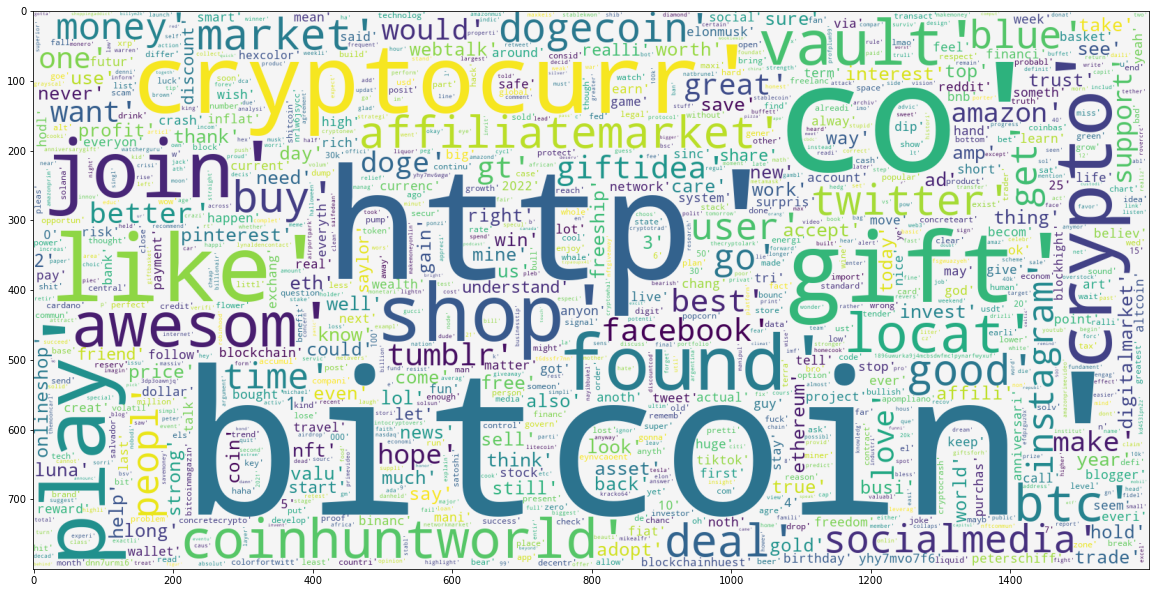

In [7]:
positive = df_pos['cleaned']
plt.figure(figsize = (20,20))
wc = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(positive))
plt.imshow(wc)



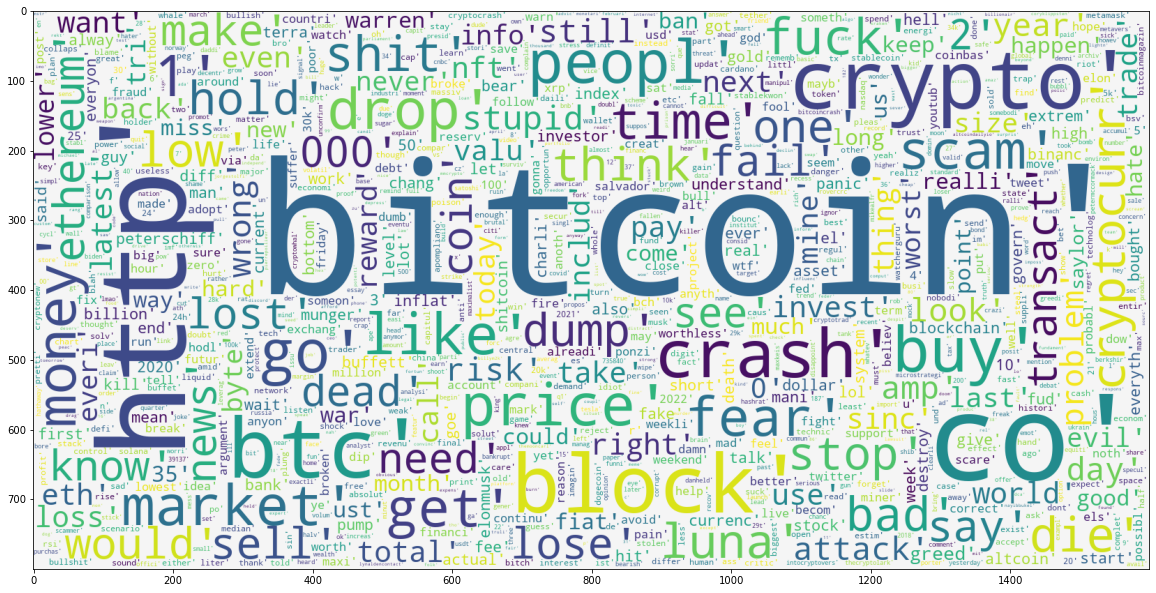

In [8]:
negative = df_neg['cleaned']
plt.figure(figsize = (20,20))
wc2 = WordCloud(background_color='whitesmoke',max_words = 1000 , width = 1600 , height = 800,
               collocations=False).generate(" ".join(negative))
plt.imshow(wc2)


In [58]:

##asigning value to positive, negative and neutral, negative(0), neutral(1), positive(2)
sentiment0=[]
for i in range(len(df)):
    if df.loc[i,'negative']>0:
        sentiment0+=[0]
    elif df.loc[i,'positive']>0:
        sentiment0+=[2]        
    else:
        sentiment0+=[1]     

In [59]:
df['sentiment']=sentiment0
df['sentiment'].value_counts()
bitcoin = df.rename(columns={"Datetime": "date"})
bitcoin.head()

,Unnamed: 0,date,cleaned,negative,neutral,positive,comp,sentiment
0,0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423,0
1,1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000,1
2,2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000,1
3,3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360,2
4,4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000,0


In [60]:
target = bitcoin["cleaned"]
target_names = bitcoin[["sentiment"]]


In [12]:
# Separating the 95% data for training data and 5% for testing data
X_train, X_test, y_train, y_test = train_test_split(target, target_names,test_size = 0.05, random_state = 42)

In [13]:
vectoriser = TfidfVectorizer(ngram_range=(1,2), max_features=600000)
vectoriser.fit(X_train)
print('No. of feature_words: ', len(vectoriser.get_feature_names()))

No. of feature_words:  600000


In [14]:
X_train = vectoriser.transform(X_train)
X_test  = vectoriser.transform(X_test)

In [15]:
def model_Evaluate(model):
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    cf_matrix = confusion_matrix(y_test, y_pred)
    
    sentiment = ['Negative','Neutral', 'Positive']
    group_names = ['True Neg','False Pos', 'False Neg','True Pos']
    
    group_percentages = ['{0:.2%}'.format(value) for value in cf_matrix.flatten() / np.sum(cf_matrix)]
    labels = [f'{v1}n{v2}' for v1, v2 in zip(group_names,group_percentages)]
    labels = np.asarray(labels).reshape(2,2)
    sns.heatmap(cf_matrix, cmap = 'Blues', annot=True, fmt='d',
                xticklabels = sentiment, yticklabels = sentiment)
    plt.xlabel("Predicted values", fontdict = {'size':14}, labelpad = 10)
    plt.ylabel("Actual values" , fontdict = {'size':14}, labelpad = 10)
    plt.title ("Confusion Matrix", fontdict = {'size':18}, pad = 20)
    

C:\Users\Cheng\anaconda3\lib\site-packages\sklearn\utils\validation.py:63: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  return f(*args, **kwargs)


              precision    recall  f1-score   support

           0       0.83      0.73      0.77      1985
           1       0.81      0.96      0.88      3951
           2       0.91      0.68      0.78      2065

    accuracy                           0.83      8001
   macro avg       0.85      0.79      0.81      8001
weighted avg       0.84      0.83      0.83      8001



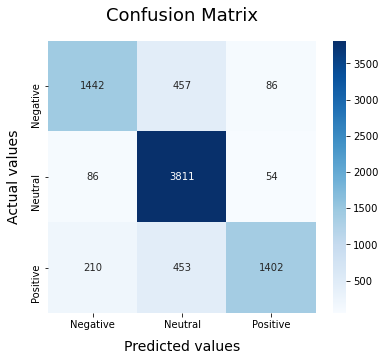

In [16]:
BNBmodel = BernoulliNB()
plt.figure(figsize = (6,5))
BNBmodel.fit(X_train, y_train)
model_Evaluate(BNBmodel)
y_pred1 = BNBmodel.predict(X_test)

# plt.savefig("../images/btcconfusion.png")

In [17]:
crypto = pd.read_csv(os.path.join("../Data", "price.csv"))

In [18]:
crypto['Change BTC'] = crypto.bitcoin_price - crypto.bitcoin_price.shift(1)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,37.885934
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-470.067885
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-656.857913
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,175.554222
...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,-114.164630
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,1266.997362
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,1535.030669
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-2159.018238


In [19]:
crypto['BTC Up/Down'] = np.where(crypto['Change BTC']>0, 1, 0)
crypto

,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,date,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,0,14884.979992,328.653136,0.003901,2020-05-19,5.967659e+10,2.045635e+10,3.159139e+08,NaN,0
1,1,14922.865925,326.538524,0.003891,2020-05-20,5.668974e+10,1.561838e+10,1.867668e+08,37.885934,1
2,2,14452.798040,318.473767,0.003781,2020-05-21,5.283982e+10,1.582295e+10,1.764923e+08,-470.067885,0
3,3,13795.940128,302.899061,0.003681,2020-05-22,5.476526e+10,1.234986e+10,2.064283e+08,-656.857913,0
4,4,13971.494350,315.525952,0.003858,2020-05-23,4.238211e+10,1.627442e+10,2.184323e+08,175.554222,1
...,...,...,...,...,...,...,...,...,...,...
725,725,42267.741872,2898.843244,0.127568,2022-05-14,1.031672e+11,3.457985e+10,1.679408e+09,-114.164630,0
726,726,43534.739233,2976.736395,0.129823,2022-05-15,3.714673e+10,2.075952e+10,9.658377e+08,1266.997362,1
727,727,45069.769903,3089.689306,0.134079,2022-05-16,3.302329e+10,2.071565e+10,7.538429e+08,1535.030669,1
728,728,42910.751665,2905.144652,0.126187,2022-05-17,4.075195e+10,2.877878e+10,7.785160e+08,-2159.018238,0


In [20]:
btc_sentiment = bitcoin.groupby('date')['sentiment'].mean()
btc_sentiment = btc_sentiment.reset_index()
btc_sentiment

,date,sentiment
0,2022-05-01,1.017998
1,2022-05-02,1.035496
2,2022-05-03,1.024498
3,2022-05-04,1.065493
4,2022-05-05,1.019798
5,2022-05-06,1.041596
6,2022-05-07,1.018498
7,2022-05-08,0.972703
8,2022-05-09,0.954505
9,2022-05-10,0.996800


In [21]:
btc_sentiment_move = pd.merge(btc_sentiment, crypto,how='outer', on='date')

In [22]:
btc_sentiment_move.dropna(subset=['sentiment'])

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,2022-05-01,1.017998,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-1174.403464,0
1,2022-05-02,1.035496,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,1013.841691,1
2,2022-05-03,1.024498,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,177.784538,1
3,2022-05-04,1.065493,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-1529.031071,0
4,2022-05-05,1.019798,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,1521.941579,1
5,2022-05-06,1.041596,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-3302.243797,0
6,2022-05-07,1.018498,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,-374.022563,0
7,2022-05-08,0.972703,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-767.284960,0
8,2022-05-09,0.954505,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-1929.448735,0
9,2022-05-10,0.996800,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-4817.478333,0


In [23]:
btc_clean = btc_sentiment_move.drop(columns=['ethereum_price', 'dogecoin_price'])
btc_clean1 = btc_clean.dropna(subset=['sentiment'])

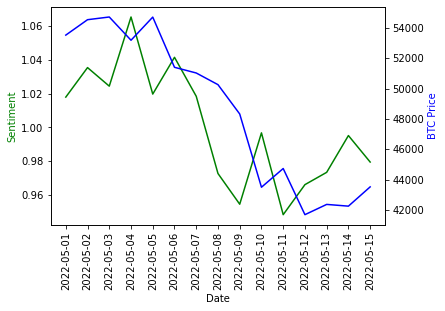

In [61]:
x = btc_clean1["date"]
y1 = btc_clean1["sentiment"]
y2 = btc_clean1["bitcoin_price"]


fig, ax1 = plt.subplots()

plt.xticks(rotation = 90)
ax2 = ax1.twinx()


ax1.plot(x, y1, 'g-')
ax2.plot(x, y2, 'b-')

ax1.set_xlabel('Date')
ax1.set_ylabel('Sentiment', color='g')
ax2.set_ylabel('BTC Price', color='b')


plt.savefig("../images/btcprice.png",bbox_inches='tight')

plt.show()



In [25]:
btc1 = bitcoin.drop(columns=["Unnamed: 0"], axis = 1)
btc1

,date,cleaned,negative,neutral,positive,comp,sentiment
0,2022-05-01,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0.304,0.696,0.000,-0.5423,0
1,2022-05-01,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",0.000,1.000,0.000,0.0000,1
2,2022-05-01,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",0.000,1.000,0.000,0.0000,1
3,2022-05-01,"['realiz', 'attract', 'religion', 'asset', 'pr...",0.000,0.414,0.586,0.8360,2
4,2022-05-01,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0.114,0.773,0.114,0.0000,0
...,...,...,...,...,...,...,...
160011,2022-05-15,"['wall', 'street', 'kurdu', 'kripto', 'kurslar...",0.000,1.000,0.000,0.0000,1
160012,2022-05-15,"['huge', 'buy', 'power', 'kda', '72', 'hour', ...",0.000,0.859,0.141,0.3182,2
160013,2022-05-15,"['educacionfinanciera', 'bitcoin', 'talk', 'cr...",0.000,1.000,0.000,0.0000,1
160014,2022-05-15,"['analysi', 'may', '15th', 'current', 'price',...",0.103,0.897,0.000,-0.4939,0


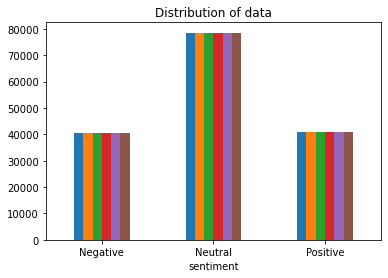

In [26]:
# Plotting the distribution for dataset.
ax = btc1.groupby('sentiment').count().plot(kind='bar', title='Distribution of data',legend=False)
ax.set_xticklabels(['Negative','Neutral','Positive'], rotation=0)
# Storing data in lists.
text, sentiment = list(btc1['cleaned']), list(btc1['sentiment'])



<AxesSubplot:xlabel='sentiment', ylabel='count'>

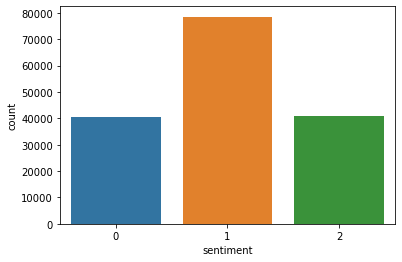

In [27]:
import seaborn as sns
sns.countplot(x='sentiment', data=btc1)

#plt.savefig("../images/btcsentiment2.png")

In [28]:
data = btc1[['cleaned', 'sentiment']]
data

,cleaned,sentiment
0,"['oh', 'think', 'im', 'pull', 'ass', 'bitcoin'...",0
1,"['cryptic', 'oz', 'bitcoin', 'es', 'baloncesto...",1
2,"['un', 'long', 'sandbox', 'sandbox', 'crypto',...",1
3,"['realiz', 'attract', 'religion', 'asset', 'pr...",2
4,"['ridicul', 'stock', 'bitcoin', 'money', 'lite...",0
...,...,...
160011,"['wall', 'street', 'kurdu', 'kripto', 'kurslar...",1
160012,"['huge', 'buy', 'power', 'kda', '72', 'hour', ...",2
160013,"['educacionfinanciera', 'bitcoin', 'talk', 'cr...",1
160014,"['analysi', 'may', '15th', 'current', 'price',...",0


In [29]:
#Separating the postivie and negative tweets
data_pos = data[data['sentiment'] == 2]
data_neg = data[data['sentiment'] == 0]

In [30]:
dataset = pd.concat([data_pos, data_neg])
dataset

,cleaned,sentiment
3,"['realiz', 'attract', 'religion', 'asset', 'pr...",2
8,"['outkastnft', 'se7enthdegen', 'gooneytoonsnft...",2
17,"['basic', 'much', '20', 'year', 'old', 'thousa...",2
19,"['letsgo', 'bitcoin', 'well']",2
20,"['uno', 'de', 'lo', 'pa', 'se', 'meno', 'desar...",2
...,...,...
159998,"['teo', 'leibowitz', 'say', 'much', 'biggest',...",0
160002,"['gemsscop', 'block', 'ledg', 'nftvictoria6', ...",0
160010,"['bitcoin', 'last', 'price', '30375', 'btc', '...",0
160014,"['analysi', 'may', '15th', 'current', 'price',...",0


In [31]:
dataset['cleaned']=dataset['cleaned'].str.lower()
dataset['cleaned'].tail()

159998    ['teo', 'leibowitz', 'say', 'much', 'biggest',...
160002    ['gemsscop', 'block', 'ledg', 'nftvictoria6', ...
160010    ['bitcoin', 'last', 'price', '30375', 'btc', '...
160014    ['analysi', 'may', '15th', 'current', 'price',...
160015    ['thejackforg', 'pay', 'bitcoin', 'send', 'cas...
Name: cleaned, dtype: object

In [32]:
stopwordlist = ['a', 'about', 'above', 'after', 'again', 'ain', 'all', 'am', 'an',
             'and','any','are', 'as', 'at', 'be', 'because', 'been', 'before',
             'being', 'below', 'between','both', 'by', 'can', 'd', 'did', 'do',
             'does', 'doing', 'down', 'during', 'each','few', 'for', 'from',
             'further', 'had', 'has', 'have', 'having', 'he', 'her', 'here',
             'hers', 'herself', 'him', 'himself', 'his', 'how', 'i', 'if', 'in',
             'into','is', 'it', 'its', 'itself', 'just', 'll', 'm', 'ma',
             'me', 'more', 'most','my', 'myself', 'now', 'o', 'of', 'on', 'once',
             'only', 'or', 'other', 'our', 'ours','ourselves', 'out', 'own', 're','s', 'same', 'she', "shes", 'should', "shouldve",'so', 'some', 'such',
             't', 'than', 'that', "thatll", 'the', 'their', 'theirs', 'them',
             'themselves', 'then', 'there', 'these', 'they', 'this', 'those',
             'through', 'to', 'too','under', 'until', 'up', 've', 'very', 'was',
             'we', 'were', 'what', 'when', 'where','which','while', 'who', 'whom',
             'why', 'will', 'with', 'won', 'y', 'you', "youd","youll", "youre",
             "youve", 'your', 'yours', 'yourself', 'yourselves']

In [33]:
STOPWORDS = set(stopwordlist)
def cleaning_stopwords(text):
    return " ".join([word for word in str(text).split() if word not in STOPWORDS])
dataset['cleaned'] = dataset['cleaned'].apply(lambda text: cleaning_stopwords(text))
dataset['cleaned'].head()

3     ['realiz', 'attract', 'religion', 'asset', 'pr...
8     ['outkastnft', 'se7enthdegen', 'gooneytoonsnft...
17    ['basic', 'much', '20', 'year', 'old', 'thousa...
19                        ['letsgo', 'bitcoin', 'well']
20    ['uno', 'de', 'lo', 'pa', 'se', 'meno', 'desar...
Name: cleaned, dtype: object

In [34]:
#Cleaning and removing punctuations
import string
english_punctuations = string.punctuation
punctuations_list = english_punctuations
def cleaning_punctuations(text):
    translator = str.maketrans('', '', punctuations_list)
    return text.translate(translator)
dataset['cleaned']= dataset['cleaned'].apply(lambda x: cleaning_punctuations(x))
dataset['cleaned'].tail()

159998    teo leibowitz say much biggest debt base ponzi...
160002    gemsscop block ledg nftvictoria6 bitcoin solan...
160010    bitcoin last price 30375 btc daili indic rsi 3...
160014    analysi may 15th current price btc 30384 36 3 ...
160015         thejackforg pay bitcoin send case white claw
Name: cleaned, dtype: object

In [35]:
import re

#Cleaning and removing repeating characters
def cleaning_repeating_char(text):
    return re.sub(r'(.)1+', r'1', text)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_repeating_char(x))
dataset['cleaned'].tail()

159998    teo leibowitz say much biggest debt base ponzi...
160002    gemsscop block ledg nftvictoria6 bitcoin solan...
160010    bitcoin last price 30375 btc daili indic rsi 3...
160014    analysi may15th current price btc 30384 36 3 5...
160015         thejackforg pay bitcoin send case white claw
Name: cleaned, dtype: object

In [36]:
#Cleaning and removing URLs
def cleaning_URLs(data):
    return re.sub('((www.[^s]+)|(https?://[^s]+))',' ',data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_URLs(x))
dataset['cleaned'].tail()

159998    teo leibowitz say much biggest debt base ponzi...
160002    gemsscop block ledg nftvictoria6 bitcoin solan...
160010    bitcoin last price 30375 btc daili indic rsi 3...
160014    analysi may15th current price btc 30384 36 3 5...
160015         thejackforg pay bitcoin send case white claw
Name: cleaned, dtype: object

In [37]:
#Cleaning numbers out
def cleaning_numbers(data):
    return re.sub('[0-9]+', '', data)
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: cleaning_numbers(x))
dataset['cleaned'].tail()

159998    teo leibowitz say much biggest debt base ponzi...
160002    gemsscop block ledg nftvictoria bitcoin solana...
160010    bitcoin last price  btc daili indic rsi       ...
160014    analysi mayth current price btc     domin   ma...
160015         thejackforg pay bitcoin send case white claw
Name: cleaned, dtype: object

In [38]:
#appllying stemming
import nltk
st = nltk.PorterStemmer()
def stemming_on_text(data):
    text = [st.stem(word) for word in data]
    return data
dataset['cleaned']= dataset['cleaned'].apply(lambda x: stemming_on_text(x))
dataset['cleaned'].head()

3     realiz attract religion asset price play impor...
8     outkastnft seenthdegen gooneytoonsnft nft ok u...
17    basic much  year old thousand dollar invest wa...
19                                  letsgo bitcoin well
20    uno de lo pa se meno desarrollado del mundo ad...
Name: cleaned, dtype: object

In [44]:
#applying lemmatizer
lm = nltk.WordNetLemmatizer()
def lemmatizer_on_text(data):
    text = [lm.lemmatize(word) for word in data]
    return data
dataset['cleaned'] = dataset['cleaned'].apply(lambda x: lemmatizer_on_text(x))
dataset['cleaned'].head()
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

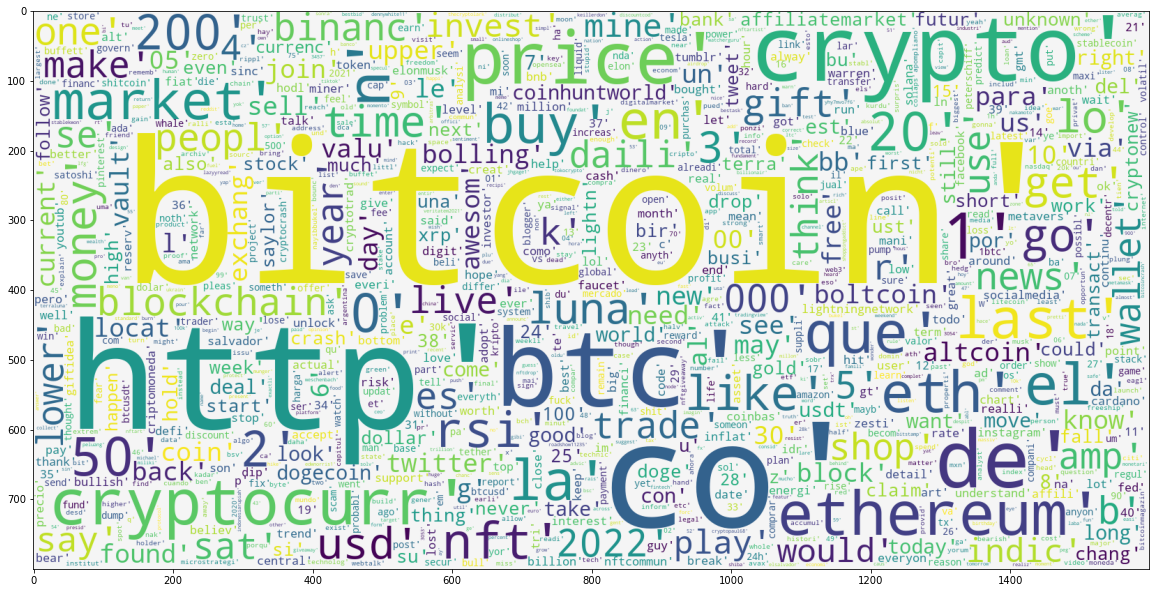

In [40]:
data_neg = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_neg))
plt.imshow(wc)

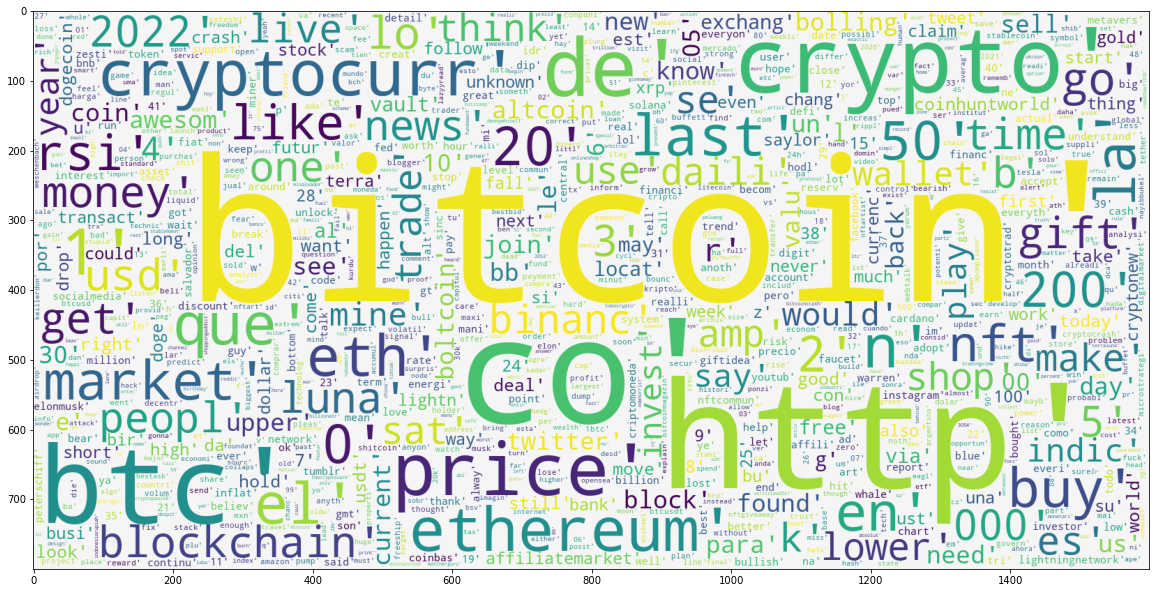

In [41]:

data_pos = data['cleaned'][:800000]
plt.figure(figsize = (20,20))
wc2 = WordCloud(max_words = 1000 , background_color='whitesmoke',width = 1600 , height = 800,
               collocations=False).generate(" ".join(data_pos))
plt.imshow(wc2)

In [42]:
btc = btc_sentiment_move[(btc_sentiment_move['date'] > '2022-04-30') & (btc_sentiment_move['date'] < '2022-05-16')]
btc

,date,sentiment,Unnamed: 0,bitcoin_price,ethereum_price,dogecoin_price,bitcoin_volume,ethereum_volume,dogecoin_volume,Change BTC,BTC Up/Down
0,2022-05-01,1.017998,712,53518.018858,3874.650573,0.180779,2.965347e+10,1.785574e+10,1.206468e+09,-1174.403464,0
1,2022-05-02,1.035496,713,54531.860549,4008.085357,0.188247,3.517429e+10,2.050259e+10,1.306821e+09,1013.841691,1
2,2022-05-03,1.024498,714,54709.645087,4059.288782,0.186066,4.231498e+10,2.511270e+10,1.018619e+09,177.784538,1
3,2022-05-04,1.065493,715,53180.614016,3921.344785,0.182778,3.249291e+10,1.806705e+10,7.256790e+08,-1529.031071,0
4,2022-05-05,1.019798,716,54702.555595,4053.948028,0.187391,4.374783e+10,2.388912e+10,1.048635e+09,1521.941579,1
5,2022-05-06,1.041596,717,51400.311798,3866.281839,0.180483,5.250914e+10,2.929791e+10,1.573665e+09,-3302.243797,0
6,2022-05-07,1.018498,718,51026.289235,3814.224690,0.180969,4.552599e+10,2.898637e+10,1.233530e+09,-374.022563,0
7,2022-05-08,0.972703,719,50259.004275,3731.605078,0.180549,2.702844e+10,1.770002e+10,1.007459e+09,-767.284960,0
8,2022-05-09,0.954505,720,48329.555540,3571.264784,0.176215,4.370554e+10,2.919468e+10,9.566095e+08,-1929.448735,0
9,2022-05-10,0.996800,721,43512.077206,3234.184510,0.151046,8.390590e+10,4.943897e+10,1.727538e+09,-4817.478333,0


<Figure size 432x288 with 0 Axes>

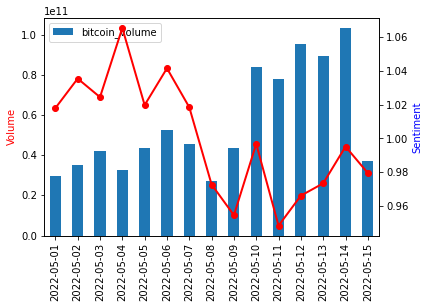

In [48]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = btc[['bitcoin_volume']].plot(kind='bar', use_index=True)
ax2 = ax.twinx()
# ax.set_yticklabels(btc['bitcoin_volume'])
ax.set_ylabel('Volume', color='r')
ax2.set_ylabel('Sentiment', color='b')


ax.set_xticklabels(btc['date'], rotation=90)
ax2.plot(btc[['sentiment']].values, linestyle='-', marker='o', linewidth=2.0, color="red")
plt.savefig("../images/btcvolume.png", bbox_inches='tight')